# Reducción de dimensionalidad

La reducción de la dimensionalidad es un procedimiento muy común usado para disminuir el número de características que se aplican en un modelo. Cuando se tienen altas dimensiones, es más probable que el algoritmo se desempeñe no tan bien en las predicciones. A esto se llama maldición de la dimensionalidad.

## Conjunto de datos

En este notebook usaremos un conjunto de datos proveniente de la página de datos abiertos de Colombia: https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Emergencias-Naturales/xjv9-mim9.

Los datos corresponden a desastres naturales (54 eventos diferentes) ocurridos en diferentes municipios y corregimientos colombianos entre 1998 y 2013. El dataset original contiene 23318 registros y 31 columnas. Sin embargo no se trabajan con todas las columnas, ya que muchas contienen datos nulos. Se realiza una [tabulación cruzada](https://es.wikipedia.org/wiki/Tabulaci%C3%B3n_cruzada) de la columna "municipio" y la columna "evento". Finalmente obtenemos una tabla con el siguiente formato:

X | ACCIDENTE | ACCIDENTE AEREO | ACCIDENTE DE TRANSITO | ... |
---------|----------------|---------|------------|----------------
ABEJORRAL | 0 | 1 | 0 | ... 
ABREGO | 0 | 0 | 3 |...
...|...|...|...|...

Cada columna corresponde a un evento o desastre y cada fila corresponde a un municipio o corregimiento. El tamaño de la matriz final es de 1153 x 54

## T-SNE

Es una técnica usada para reducción de dimensionalidad. Es muy usada particularmente para visualizar conjuntos de datos de alta dimensionalidad. Básicamente se trata de minimizar la siguiente función de costo (llamada la divergencia de Kullback–Leibler) a través de descenso por gradiente:

![Imagen](https://wikimedia.org/api/rest_v1/media/math/render/svg/cae779cfc3a41b382e68850f0381b6a6b7fdede7)

Basta saber que $p_{ij}$ y $q_{ij}$ representa la similitud de los datos en la dimensión original y en la nueva dimensión respectivamente. Es decir, que el algoritmo T-SNE mapea los puntos o datos a una dimensión menor, intentando mantener la similitud entre los datos originales y los datos transformados. Esto quiere decir que la matriz de similitud (Similarity matrix)  de los datos originales $M_o$ y la matriz de similitud de los datos transformados $M_t$ son aproximadamente iguales.

Una aplicación común de este algoritmo es la visualización de los vectores creados a partir de las palabras usando el algoritmo [Word2Vec](https://en.wikipedia.org/wiki/Word2vec). Este algoritmo transforma las palabras en vectores de alta dimensionalidad. Sin embargo, para poder "visualizar" los vectores se usa el algoritmo T-SNE. La siguiente imagen muestra cómo el algoritmo T-SNE reduce la dimensionalidad efectivamente, manteniendo la cercanía entre palabras similares.

<img src="https://colah.github.io/posts/2014-07-NLP-RNNs-Representations/img/Turian-WordTSNE.png" width="500" align="middle" >


## PCA

El análisis de componentes principales selecciona las direcciones con mayor variabilidad. Permitiendo eliminar las direcciones con menor variabilidad, pues estas tienen menos información.



## Aplicación en los datos

In [1]:
import pandas as pd
import numpy as np
from sklearn import manifold
import sklearn.metrics.pairwise as p
from sklearn.decomposition import PCA
import unicodedata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter


In [2]:
#numero de componentes para la reducción de la dimensionalidad
n_components=2

In [3]:
#Lectura de datos
emergencias = pd.read_csv("Emergencias_Naturales.csv")

#Normalización del nombre de los municipios
#emergencias['municipio'] = map(lambda st: unicodedata.normalize('NFKD', st.decode('utf-8')).encode('ASCII', 'ignore'),emergencias['municipio'])
emergencias = emergencias[emergencias['municipio']!="DEPARTAMENTO"]

In [4]:
#Tabulación cruzada
X= pd.crosstab(emergencias["municipio"], emergencias["evento"])


In [5]:
#Visualización de la tabla nueva
X.head()

evento,ACCIDENTE,ACCIDENTE AEREO,ACCIDENTE DE TRANSITO,ACCIDENTE EN MINA,ACCIDENTE MARITIMO,ACCIDENTE MINERO,ACCIDENTE TERRESTRE,ANTROPICO,AVALANCHA,COLAPSO,...,REMOCION EN MASA,REPRESAMIENTO,SEQUIA,SEQUIA/INCENDIOS FORESTALES,SISMO,TORMENTA ELECTRICA,TORNADO,VARIOS,VENDAVAL,VENDAVAL-INCENDIO ESTRUCTURAL
municipio,,,,,,,,,,,,,,,,,,,,,
ABEJORRAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABREGO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABRIAQUI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABRIAQUÍ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACACIAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
tsne = manifold.TSNE(n_components=n_components, random_state=0)

In [7]:
Y = tsne.fit_transform(X)

In [8]:
#Matrices de distancias
mdX = p.pairwise_distances(X) #Matriz de distancias original
mdY_tsne = p.pairwise_distances(Y) #Matriz de distancias halladas por el algoritmo TSNE



In [9]:
#se organizan los municipios del más parecido a mocoa al menos parecido según la matriz de distancia original
imax = np.argsort(mdX[X.index=="MOCOA"])
similares_mocoaX=X.index[imax]

#se organizan los municipios del más parecido a mocoa al menos parecido según la matriz de distancia dada por el tsne
jmax = np.argsort(mdY_tsne[X.index=="MOCOA"])
similares_mocoaY=X.index[jmax]

In [10]:
#Se toman los diez municipios más cercanos según las distancias originales y según las distancias del tsne
DF=pd.DataFrame(similares_mocoaX[0][1:10], columns=["original"])
DF["tsne"] = similares_mocoaY[0][1:10]

In [11]:
DF

,original,tsne
0,CÓRDOBA,CÓRDOBA
1,RIOSUCIO,RIOSUCIO
2,TRUJILLO,LA UNIÓN
3,LA UNIÓN,BUENAVISTA
4,BUENAVISTA,SAN PABLO
5,SUCRE,SUCRE
6,SINCELEJO,BOLÍVAR
7,SAN VICENTE DE CHUCURÍ,RIONEGRO
8,EL LITORAL DEL SAN JUAN,TRUJILLO


In [29]:
similares_mocoa = Y[imax[0][1:8]]

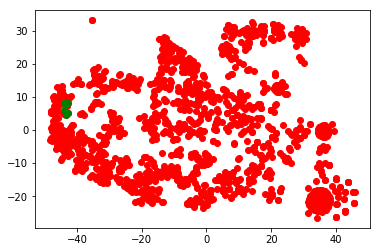

In [30]:
#Se grafican en verde los puntos más cercanos según el original
%matplotlib inline  

fig, ax = plt.subplots()

ax.scatter(Y[:,0], Y[:,1], color='r')
ax.scatter(similares_mocoa[:,0], similares_mocoa[:,1], color='g')

In [31]:
#Se aplica PCA sobre los datos
pca = PCA(n_components=2)
Y_pca =pca.fit_transform(X)

In [32]:
#Se toman los diez municipios más cercanos a Mocoa después de la reducción de dimensionalidad
mdY_pca = p.pairwise_distances(Y_pca)
jmax = np.argsort(mdY_pca[X.index=="MOCOA"])
similares_mocoaY_pca=X.index[jmax]
DF["pca"] = similares_mocoaY_pca[0][1:10]

In [33]:
DF

,original,tsne,pca
0,CÓRDOBA,CÓRDOBA,CÓRDOBA
1,RIOSUCIO,RIOSUCIO,RIOSUCIO
2,TRUJILLO,LA UNIÓN,SAN PABLO
3,LA UNIÓN,BUENAVISTA,JAMUNDÍ
4,BUENAVISTA,SAN PABLO,LA UNIÓN
5,SUCRE,SUCRE,BUENAVISTA
6,SINCELEJO,BOLÍVAR,TRUJILLO
7,SAN VICENTE DE CHUCURÍ,RIONEGRO,ISTMINA
8,EL LITORAL DEL SAN JUAN,TRUJILLO,GUAMO


In [34]:
similares_mocoa = Y_pca[jmax[0][1:10],]

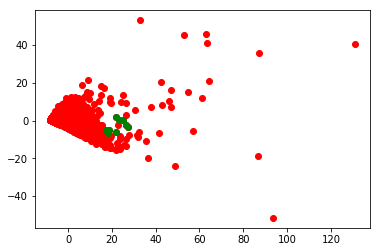

In [35]:
#Se grafican en verde los puntos más cercanos a mocoa en el original
%matplotlib inline  
fig, ax = plt.subplots()
ax.scatter(Y_pca[:,0], Y_pca[:,1], color='r')
ax.scatter(similares_mocoa[:,0], similares_mocoa[:,1], color='g')


Como se puede ver, el TSNE guarda más fidelidad a la distancias originales. En la gráfica del espacio proyectado por el algoritmo TSNE, los puntos verdes (los diez municipios más cercanos a MOCOA) están más cercanos entre sí que en la gráfica del espacio proyectado por el algoritmo PCA.